In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

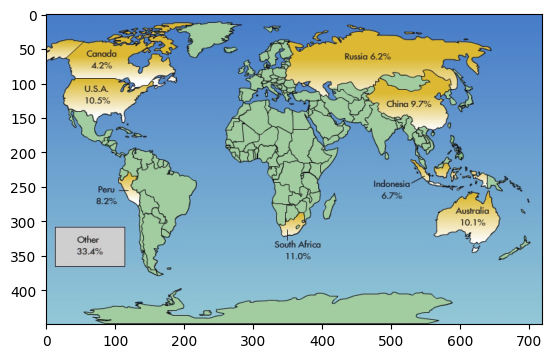

In [2]:
img = cv2.imread('/content/drive/MyDrive/Computer Vision/gold dist map.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img,cmap='gray')

In [3]:
img.shape

(450, 720, 3)

In [4]:
pixel_values = img.reshape((-1, 3)) ## reshaping the image into 2D array ... 450 * 720 = 324000
pixel_values.shape

(324000, 3)

In [5]:
pixel_values = np.float32(pixel_values) ## changing pixels values into float for using with kmeans functions

In [14]:
## criteria: number of iterations and epsilon
## centroids/means to be picked are random chosen colors when it comes to images.
## our image have almost 3 main colors to cluster: blue, green, and yellow. >> k = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.95)

In [15]:
k = 3 # 0, 1, and 2
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [16]:
centers = np.uint8(centers)
labels = labels.flatten()

In [17]:
segmented_img = centers[labels.flatten()]

In [18]:
segmented_img = segmented_img.reshape(img.shape)

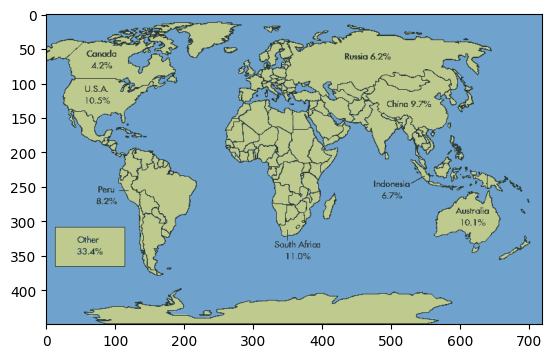

In [19]:
plt.imshow(segmented_img)